In [1]:
import numpy as np
print(f"numpy version: {np.__version__}")
import pandas as pd
print(f"pandas version: {pd.__version__}")
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
print(f"sklearn version: {pd.__version__}")
#to create a fair comparison
from sklearn.model_selection import train_test_split

numpy version: 1.22.3
pandas version: 1.4.3
sklearn version: 1.4.3


# Iris Dataset Multiclass-Classification using Linear Classifiers Models

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### sklearn returns dictionary-like object, with the following attributes:
data: - The data matrix. 

target: - The classification target.

feature_names: - The names of the dataset columns.

frame: - Only present when as_frame=True. DataFrame with data and target.

In [17]:
print(iris_dataset["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [18]:
# add iris_dataset to the pandas df
df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
print(iris_dataset["target_names"])

['setosa' 'versicolor' 'virginica']


In [21]:
iris_dataset.target # 0 means setosa , 1 means versicolor and 2 means virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [73]:
# add Classes of the wine dataset 
df['class'] = iris_dataset.target
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [74]:
#check if the df was loaded correctly and check the types of the columns
print(df.shape)
print(df.dtypes)

(150, 5)
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                  int64
dtype: object


In [75]:
#check if the df has some missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

<AxesSubplot:>

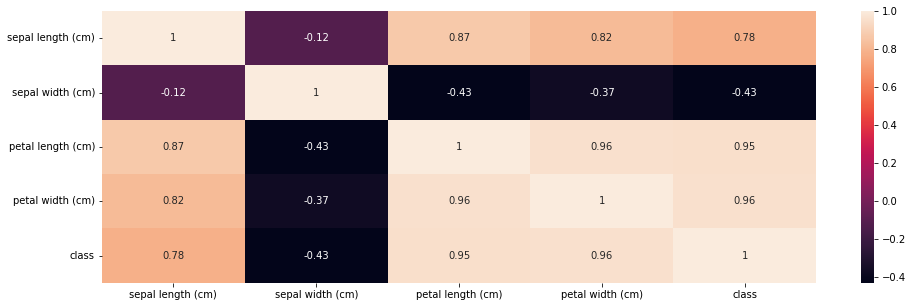

In [76]:
# create a correlation matrix that measures the linear relationships between the variables
correlation_matrix = df.corr().round(2)
# plot using seaborn lib
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True) # annot = True to print the values inside the square

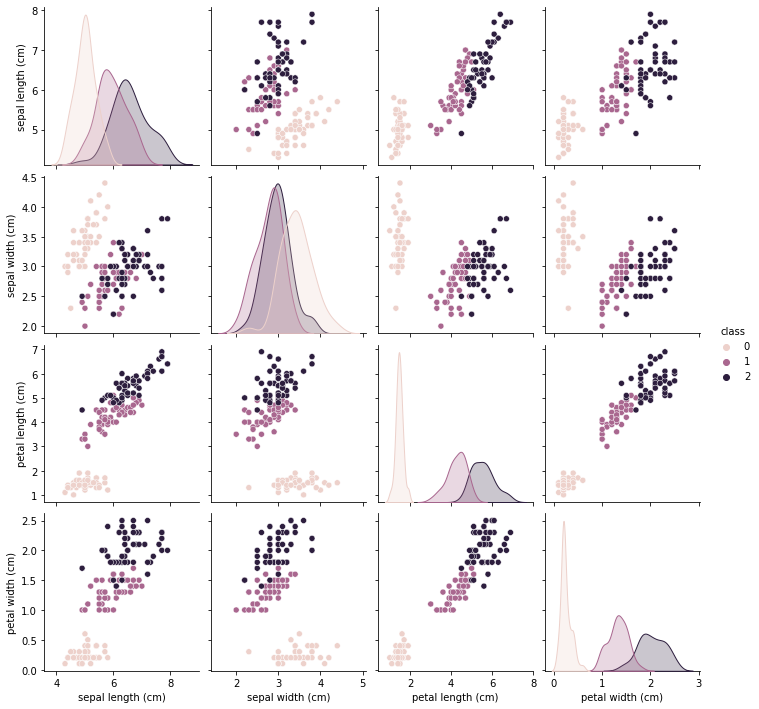

In [77]:
sns.pairplot(data=df, hue='class');

In [78]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


### Munge and split the data for training and testing

Preparing the data for training the model, let's first try to use all features and then select the features that gives the largest difference beetween classes, like: flavanoids.

We will add features in an array X and the classes labels in a corresponding array y.

In [157]:
# get all features
X = df.iloc[:, :-1]

# X = pd.DataFrame(np.c_[df["sepal length (cm)"], df["sepal length (cm)"]], columns = ["sepal length (cm)","sepal length (cm)"])
X.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [158]:
# get labels
y = df['class']

In [159]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [160]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
                                                   test_size = 0.15,
                                                   random_state = 20230201)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(127, 4)
(127,)
(23, 4)
(23,)


#### Training and testing the linear classifiers model for multi-class classification 
 

In [181]:
# lets us take some Logistic Regression that is a binary classifier 
#that can be extended to multi-class classification using the One vs All (OvA) or One vs One (OvO) approaches
from sklearn import linear_model

# model = linear_model.RidgeClassifier()
model = linear_model.LogisticRegression(random_state=0, multi_class="ovr")
model = model.fit(X_train,y_train)

#### Model evaluation 

In [182]:
# how well is our prediction using the mean squared error (MSE) method, give us an expectation value
from sklearn.metrics import mean_squared_error

# training set
y_train_predict = model.predict(X_train)
score = mean_squared_error(y_train, y_train_predict)
print(score)

0.047244094488188976


In [183]:
# test set
y_test_predict = model.predict(X_test)
score = mean_squared_error(y_test, y_test_predict)
print(score)

0.08695652173913043


In [184]:
model.score(X_test, y_test)

0.9130434782608695

In [185]:
# three arrays that are the coefficients for our selected 4 features
model.coef_

array([[-0.44782957,  0.85483647, -2.24495237, -0.92451021],
       [-0.39948918, -2.1538725 ,  0.80137598, -1.34706811],
       [-0.35520416, -0.348523  ,  2.81291838,  2.26344225]])

In [186]:
# intercepts for the three classes
model.intercept_

array([  6.58599879,   6.64874906, -14.22971616])

#### Change the amount of trained and test sample

In [187]:
#split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, shuffle=True, 
                                                   test_size = 0.25,
                                                   random_state = 20230201)

print(X1_train.shape)
print(y1_train.shape)

print(X1_test.shape)
print(y1_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [203]:
# model = linear_model.RidgeClassifier()
model1 = linear_model.LogisticRegression(random_state=0, multi_class="ovr", max_iter=1000)
model1 = model.fit(X1_train, y1_train)

In [204]:
model1.score(X1_test, y1_test)

0.9473684210526315

In [191]:
# test set
y1_test_predict = model.predict(X1_test)
score1 = mean_squared_error(y1_test, y1_test_predict)
print(score1)

0.05263157894736842


### Check the accuracy of the predictions 

In [192]:
## making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_test_predict)
print(cm)

[[9 0 0]
 [0 5 2]
 [0 0 7]]


Accuracy:  0.9130434782608695


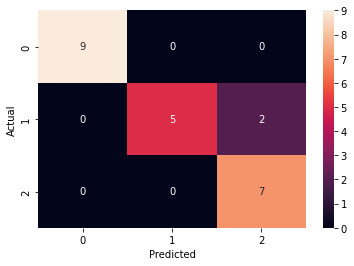

In [193]:
# ploting the Confusion Matrix
import sklearn.metrics as metrics

confusion_matrix = pd.crosstab(y_test, y_test_predict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_test_predict))
plt.show()

In [198]:
# finding accuracy from the confusion matrix by our own
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred += cm[row,c]
        else:
            falsePred += cm[row,c]
print("Correct prediction :", corrPred)
print("False prediction :", falsePred)
print("\nAccuracy of the Logistic Regression classification is  :", corrPred/(cm.sum()))

Correct prediction : 21
False prediction : 2

Accuracy of the Logistic Regression classification is  : 0.9130434782608695


The Accuracy is good, also not too high 

### Plotting the Decision Boundary 

To visualize the decision boundary for 3 classes, let's use only 2 features

In [237]:
# X = pd.DataFrame(np.c_[df["sepal length (cm)"], df["sepal length (cm)"]], columns = ["sepal length (cm)","sepal length (cm)"])
X = df.iloc[:,[0,1]]
X


,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [242]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

model = linear_model.LogisticRegression(max_iter=1000)
model = model.fit(X_train, y_train)

(120, 2)
(120,)
(30, 2)
(30,)


In [243]:
model.score(X_test, y_test)

0.8333333333333334

In [247]:
y_test_predict = model.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_test_predict))

Accuracy:  0.8333333333333334


Accuracy is lower while using less features 

In [244]:
model.intercept_, model.coef_

(array([ 7.47652984,  1.78338286, -9.2599127 ]),
 array([[-2.54960522,  2.18376486],
        [ 0.60712611, -1.58251112],
        [ 1.94247911, -0.60125374]]))

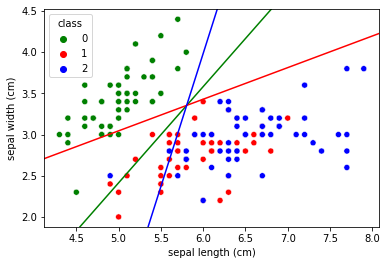

In [252]:
g =sns.scatterplot(x="sepal length (cm)",y="sepal width (cm)",
              hue="class",
              data=df,palette=['green','red','blue']);

xmin, xmax = 4, 8
ymin, ymax = 2, 5
x = np.linspace(2, 2, 100)

x = np.linspace(xmin, xmax, 100)

x1 = (-model.intercept_[0] - model.coef_[0][1]*df.iloc[0,1])/model.coef_[0][0]
x2 = (-model.intercept_[0] - model.coef_[0][1]*df.iloc[4,1])/model.coef_[0][0]
plt.axline((x1, df.iloc[0,1]), (x2, df.iloc[4,1]), color = "green")


x1 = (-model.intercept_[1] - model.coef_[1][1]*df.iloc[0,1])/model.coef_[1][0]
x2 = (-model.intercept_[1] - model.coef_[1][1]*df.iloc[4,1])/model.coef_[1][0]
plt.axline((x1, df.iloc[0,1]), (x2, df.iloc[4,1]), color = "red")

x1 = (-model.intercept_[2] - model.coef_[2][1]*df.iloc[0,1])/model.coef_[2][0]
x2 = (-model.intercept_[2] - model.coef_[2][1]*df.iloc[4,1])/model.coef_[2][0]
plt.axline((x1, df.iloc[0,1]), (x2, df.iloc[4,1]), color = "blue")
